In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# Load CSV data
labeled_geo_tesla_data = pd.read_csv('labeled_tesla_geo_data.csv', index_col='Unnamed: 0', parse_dates=['created_utc'])

# Ensure created_utc is datetime
labeled_geo_tesla_data['created_utc'] = pd.to_datetime(labeled_geo_tesla_data['created_utc'])

In [16]:
# Extract year and month
labeled_geo_tesla_data['year'] = labeled_geo_tesla_data['created_utc'].dt.year
labeled_geo_tesla_data['month'] = labeled_geo_tesla_data['created_utc'].dt.strftime('%b')  # 'Jan', 'Feb', etc.
labeled_geo_tesla_data['month_num'] = labeled_geo_tesla_data['created_utc'].dt.month  # For sorting

In [17]:
# Group by year, month, sentiment
grouped = labeled_geo_tesla_data.groupby(['year', 'month', 'month_num', 'bert_label']).size().reset_index(name='count')

# Map sentiment labels
label_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
grouped['sentiment'] = grouped['bert_label'].map(label_map)

color_map = {
    'Negative': 'red',
    'Neutral': 'gray',
    'Positive': 'green'
}

# Get unique years and loop through each
years = sorted(grouped['year'].unique())

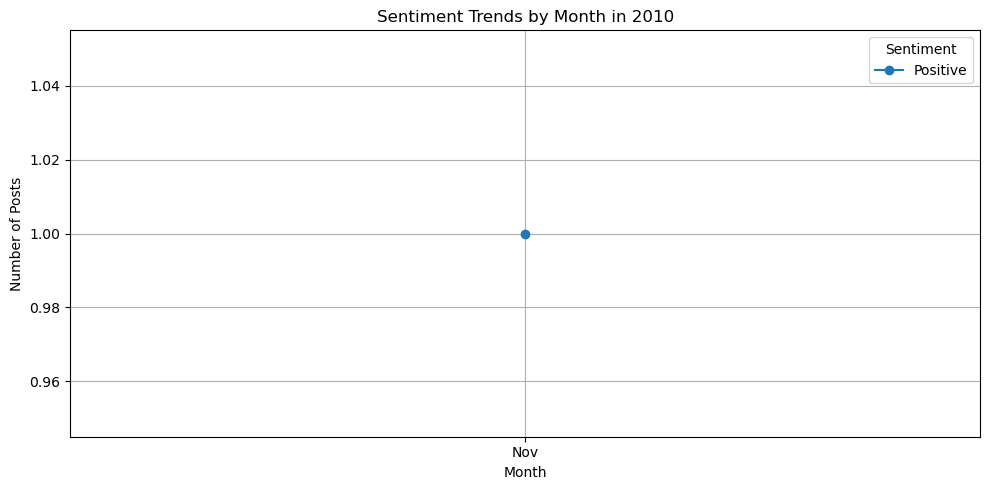

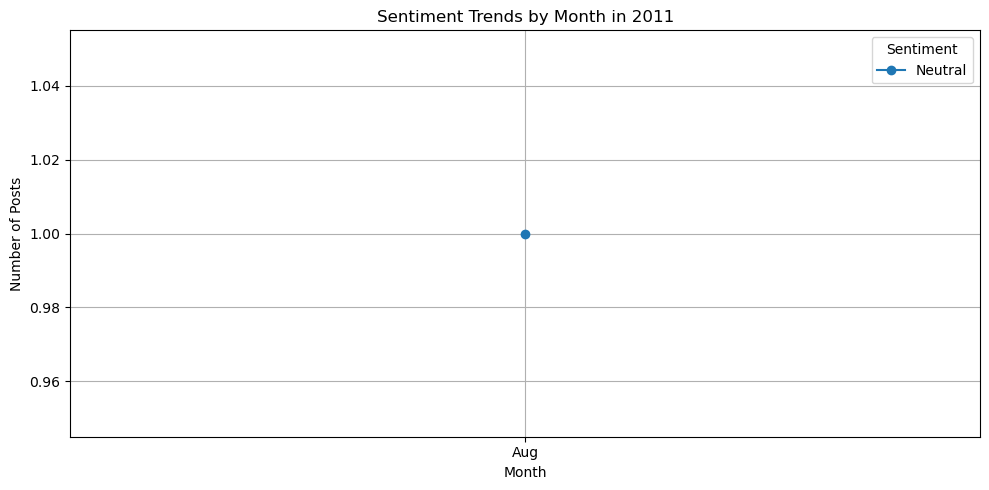

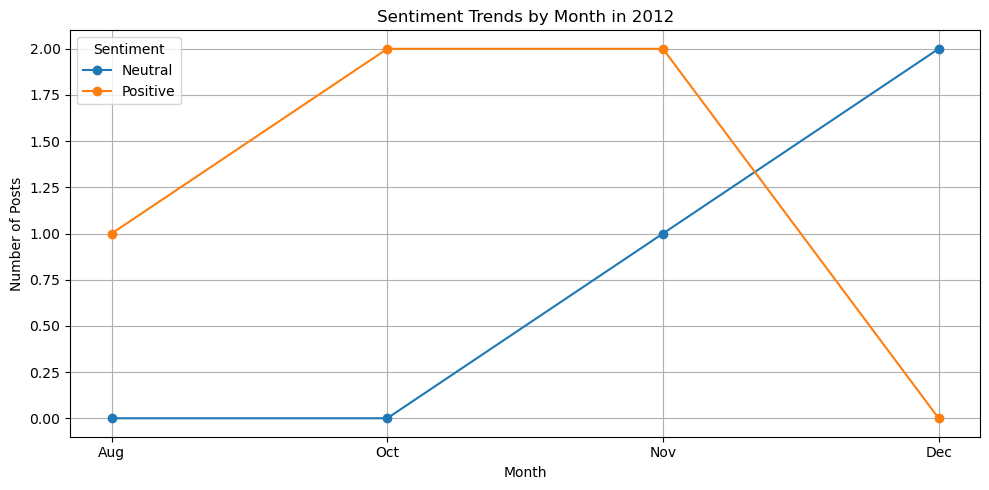

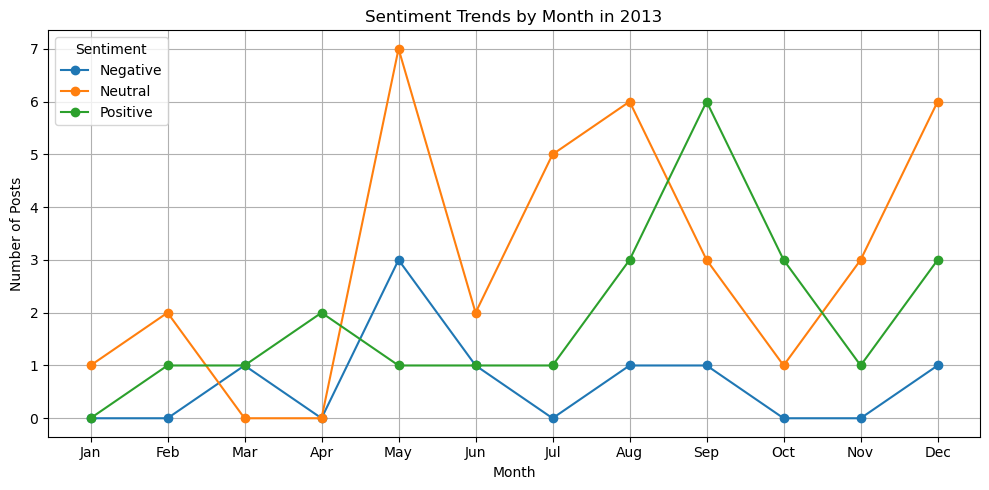

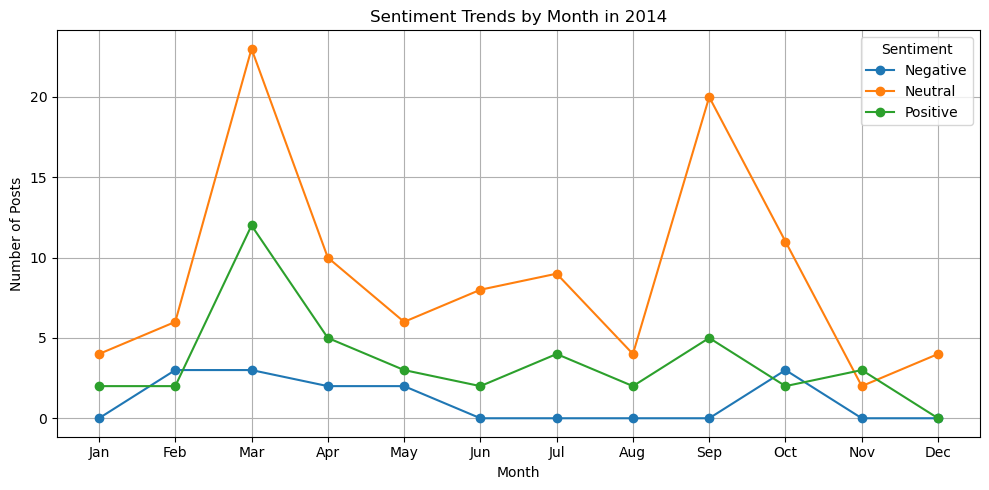

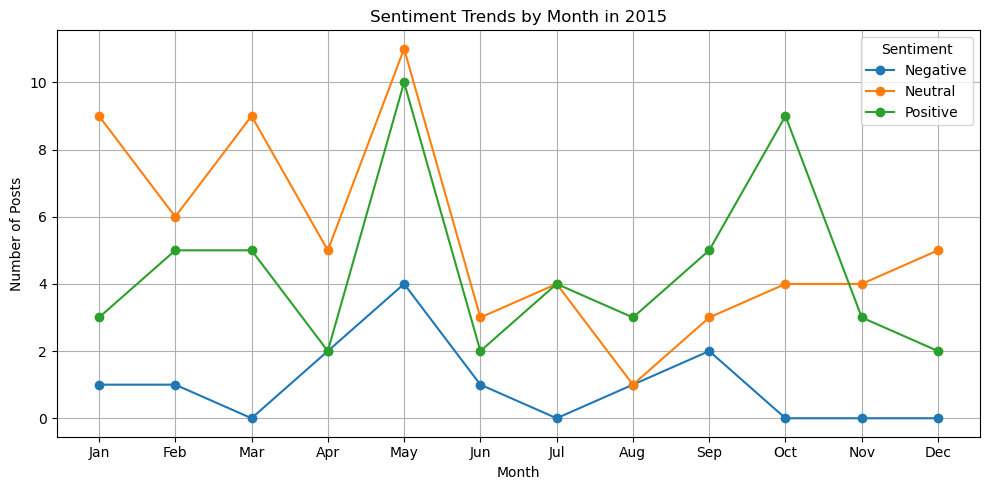

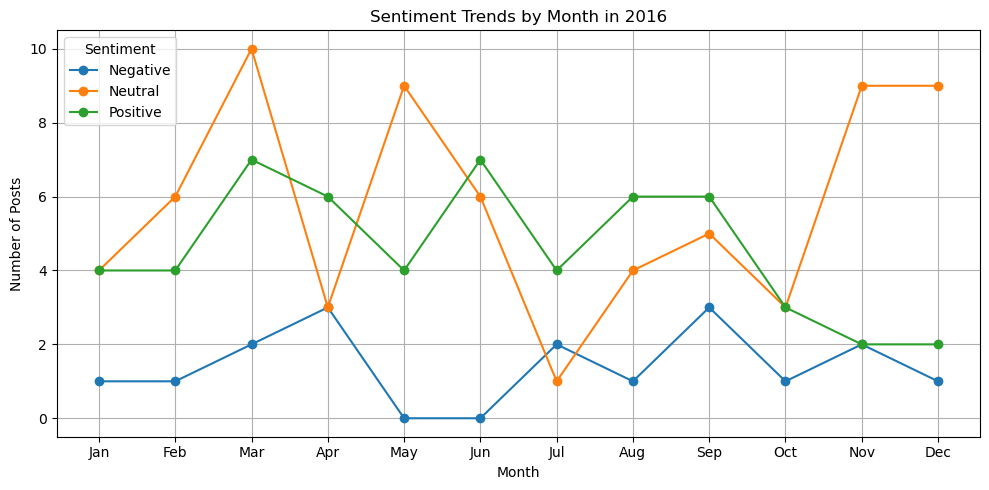

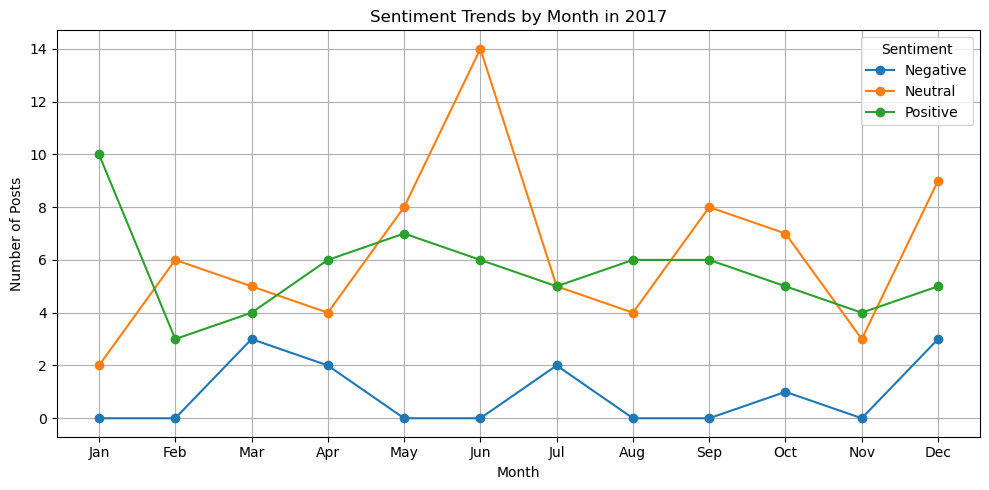

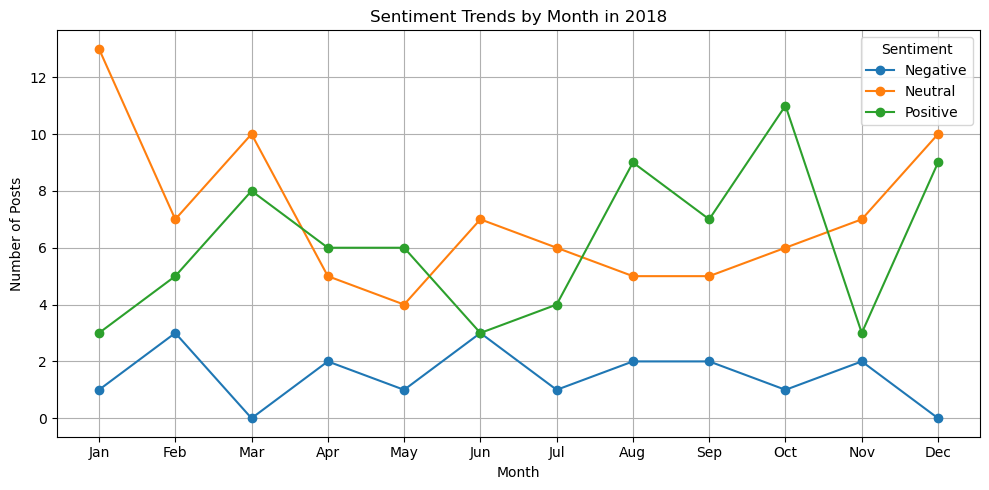

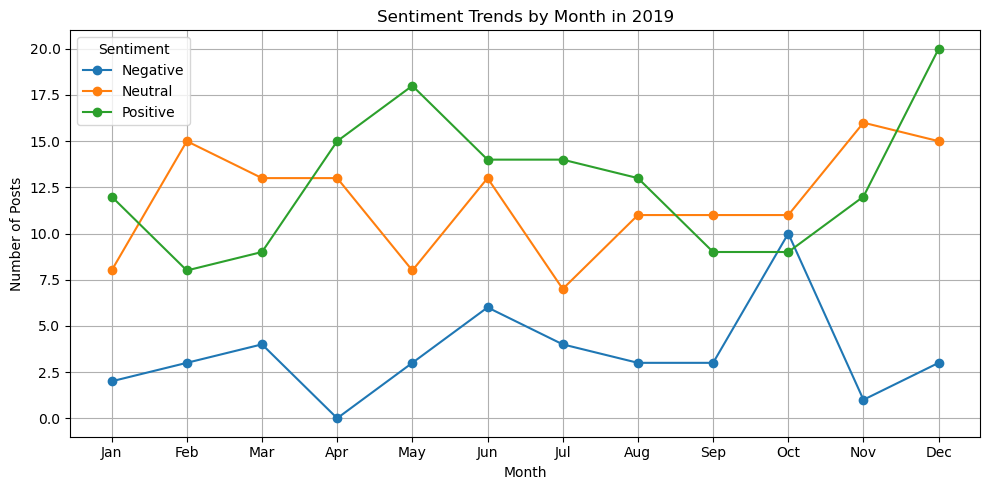

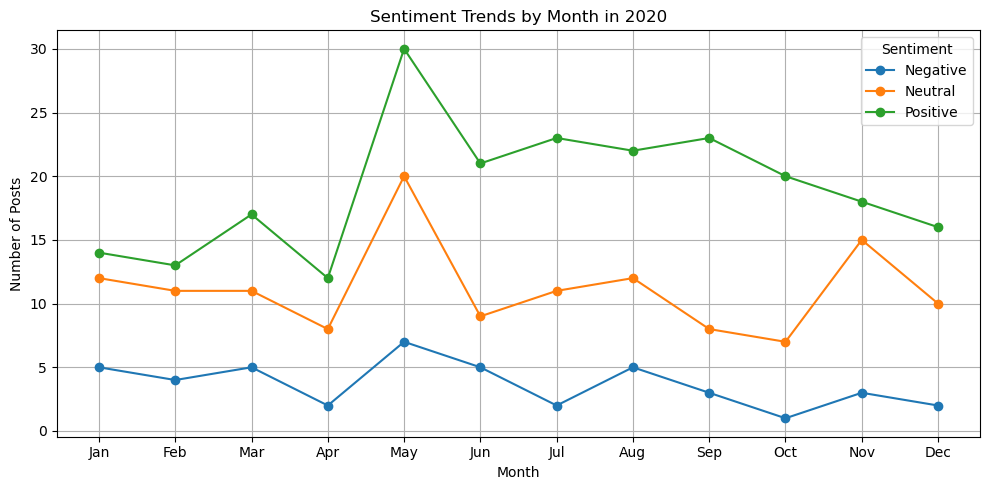

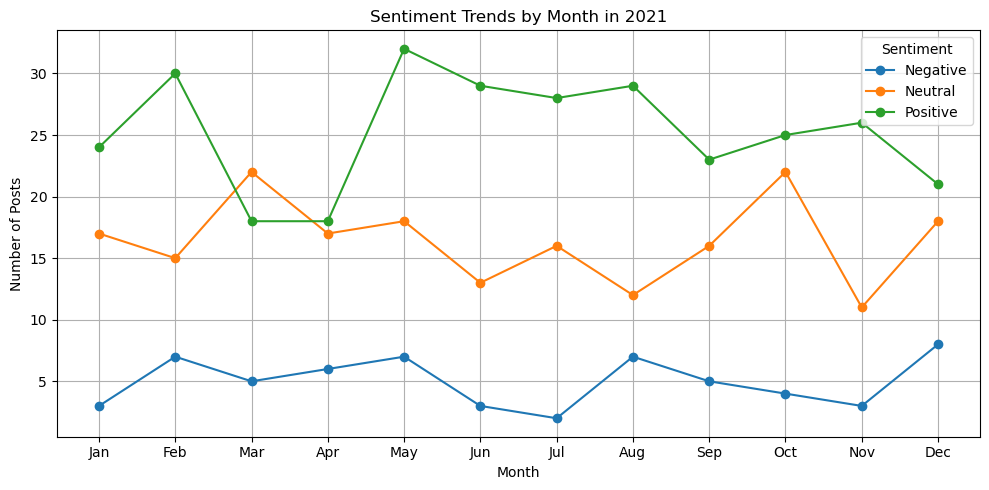

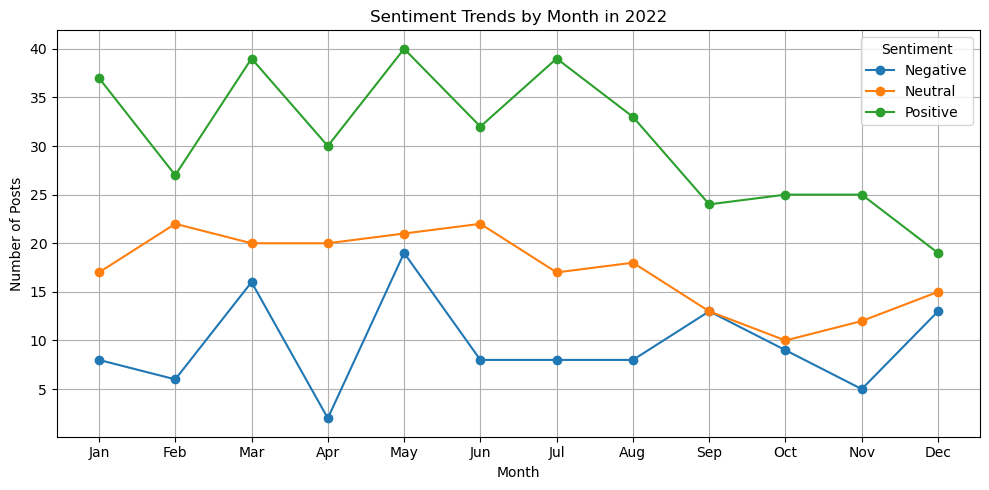

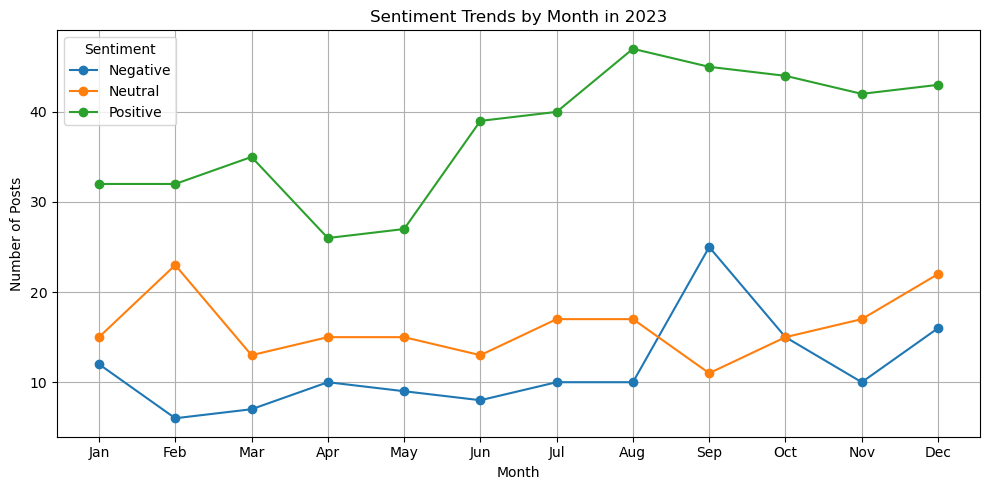

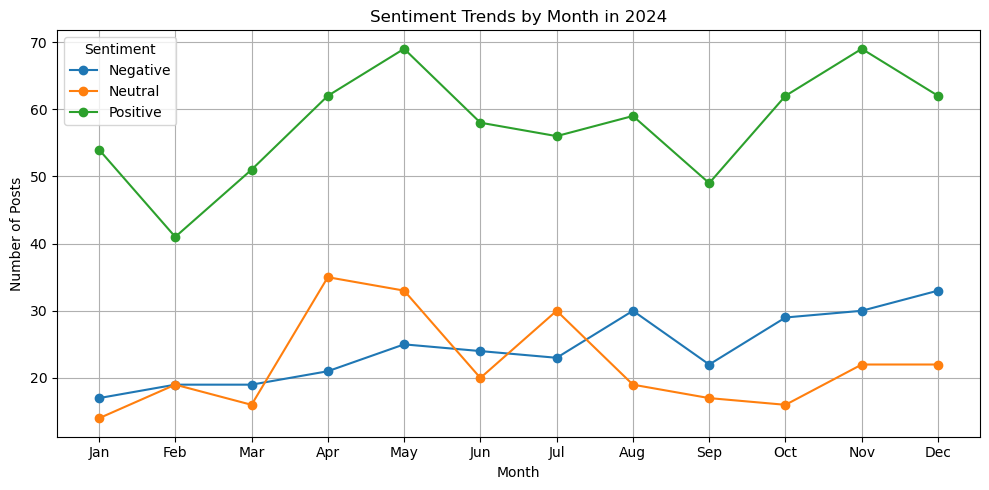

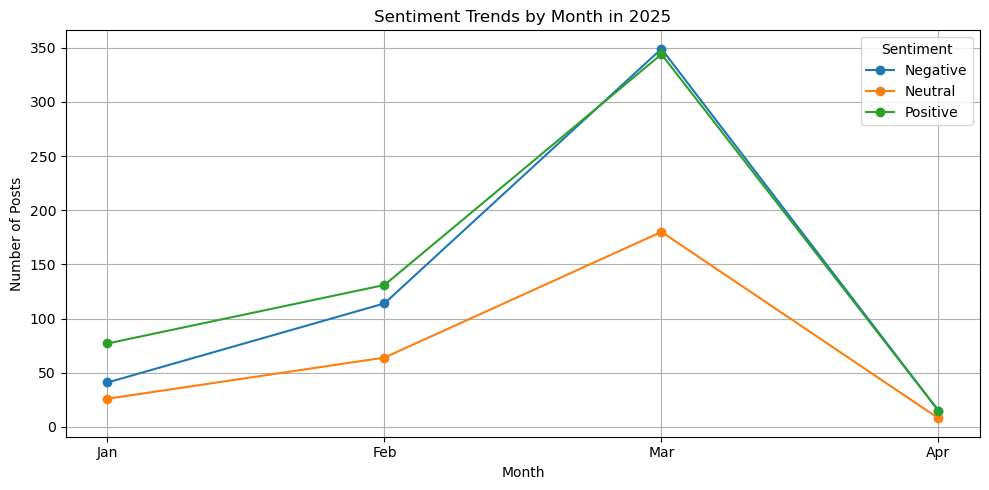

In [18]:
# Iterate through each year for visualization creation
for year in years:
    year_data = grouped[grouped['year'] == year]
    
    # Pivot so we have months as rows and sentiments as columns
    pivot = year_data.pivot_table(index=['month_num', 'month'], columns='sentiment', values='count', fill_value=0)
    pivot = pivot.sort_index()  # Sort by month_num
    
    # Plot year scatterplot
    plt.figure(figsize=(10, 5))
    for sentiment in ['Negative', 'Neutral', 'Positive']:
        if sentiment in pivot.columns:
            plt.plot(
                pivot.index.get_level_values('month'),
                pivot[sentiment],
                label=sentiment,
                marker='o',
                color=color_map[sentiment]
            )
    
    plt.title(f'Sentiment Trends by Month in {year}')
    plt.xlabel('Month')
    plt.ylabel('Number of Posts')
    plt.legend(title='Sentiment')
    plt.grid(True)
    plt.tight_layout()
    plt.show()